# Predictive Modeling with Linear Regression ( Salary Dataset ) 


Build a predictive model using linear regression to predict a numerical outcome based on one or more features. Use a dataset with a continuous target variable.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-dataset-for-linear-regression/Salary_Data.csv


# Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df = pd.read_csv("/kaggle/input/salary-data-dataset-for-linear-regression/Salary_Data.csv")

#  Explore the dataset

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
print(df.describe(include='all'))

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [8]:
df.shape

(30, 2)

In [9]:
#check any missing values

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
#any outliers

df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [11]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [12]:
#check any correlation and covariance

df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


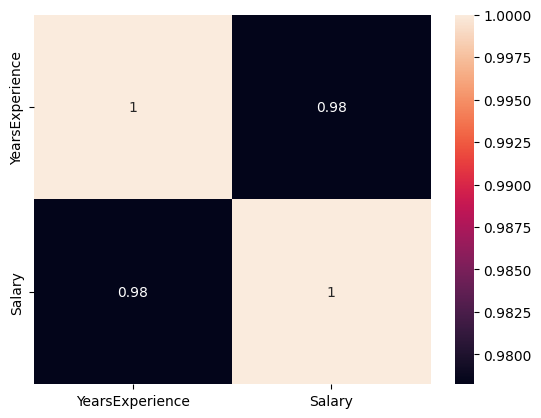

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

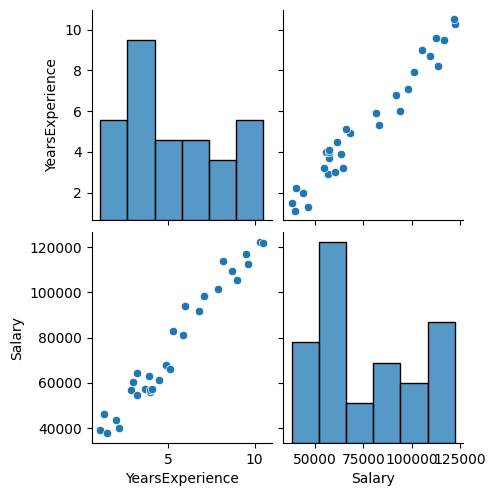

In [15]:
sns.pairplot(df)
plt.show()

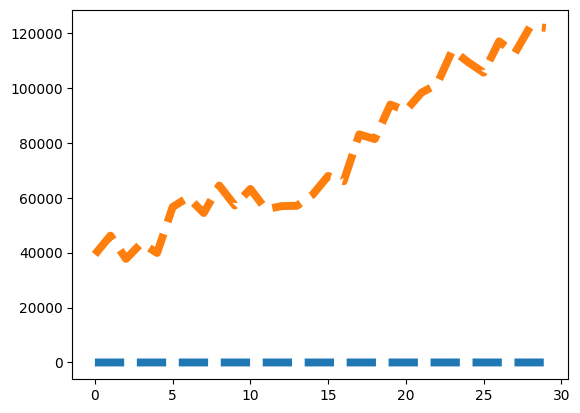

In [16]:
plt.plot(df, linestyle = '--', linewidth='5.7')

plt.show()

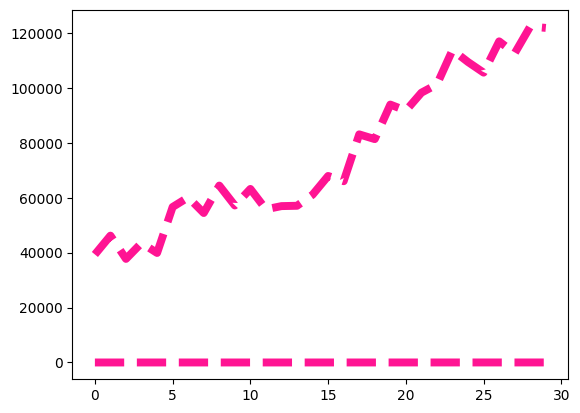

In [17]:
plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')

plt.show()

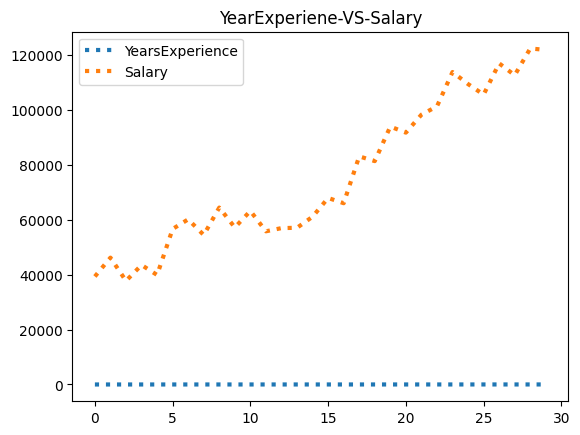

In [18]:
df.plot.line(linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

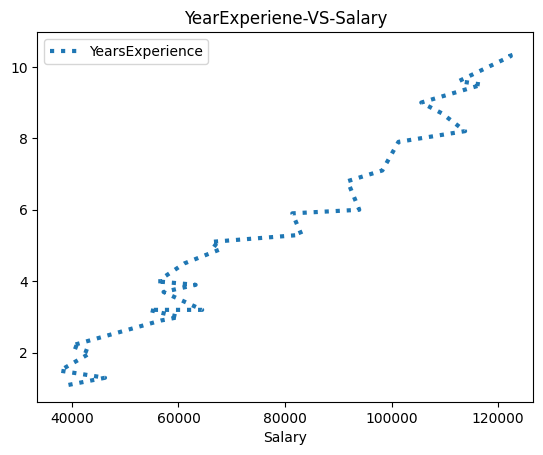

In [19]:
df = pd.DataFrame(data=df)

df.plot.line(x='Salary',linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

# Independent and Dependent Variables

In [20]:
X=df.drop('Salary',axis=1)

In [21]:
y=df.Salary

In [22]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [23]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

# Splitting the data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [26]:
print(X_train.shape)

(21, 1)


In [27]:
X_test.shape

(9, 1)

# Develop Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LR=LinearRegression()

In [30]:
LR.fit(X_train,y_train)

LinearRegression()

In [31]:
LR.intercept_   # beta 0

26777.391341197625

In [32]:
LR.coef_ 

array([9360.26128619])

# Prediction

In [33]:
y_pred=LR.predict(X_test)

In [34]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [35]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64

# Evaluation model

In [36]:
from sklearn import metrics

In [37]:
R2=metrics.r2_score(y_test,y_pred)

In [38]:
R2

0.9740993407213511

In [39]:
print(metrics.mean_absolute_error(y_test,y_pred))

3737.417861878896


In [40]:
print(metrics.mean_squared_error(y_test,y_pred))

23370078.800832972


In [41]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4834.260936361728


In [42]:
print(LR.predict([[5]])) 

[73578.69777217]


# Assumptions

In [43]:
error= y_test-y_pred

In [44]:
error

2    -3086.783270
28    -797.082589
13   -8073.462615
10     -64.410357
26    1269.126440
24    1219.335469
27   -4000.899689
11   -8424.436486
17    6701.223842
Name: Salary, dtype: float64

In [45]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

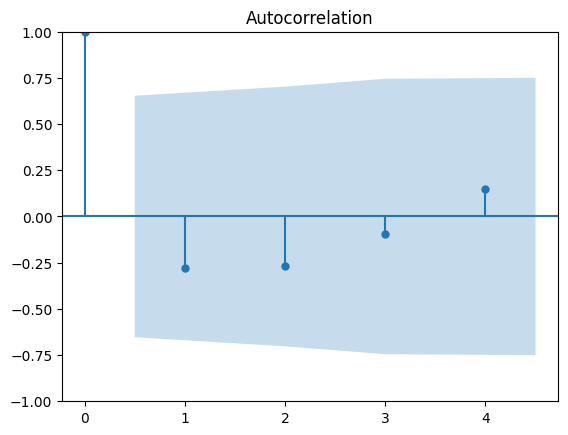

In [46]:
acf=plot_acf(error)
plt.show()

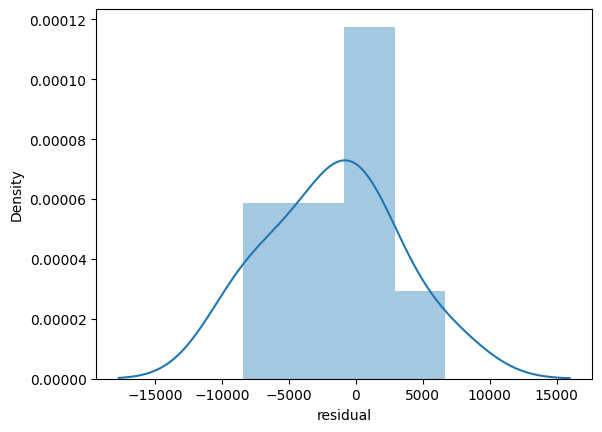

In [47]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

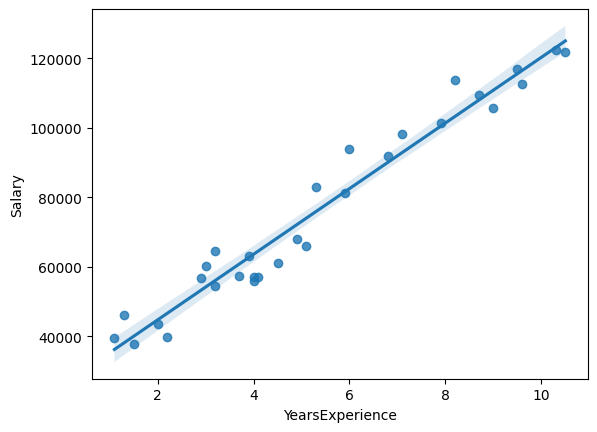

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are your data arrays
sns.regplot(x=X, y=y)
plt.show()


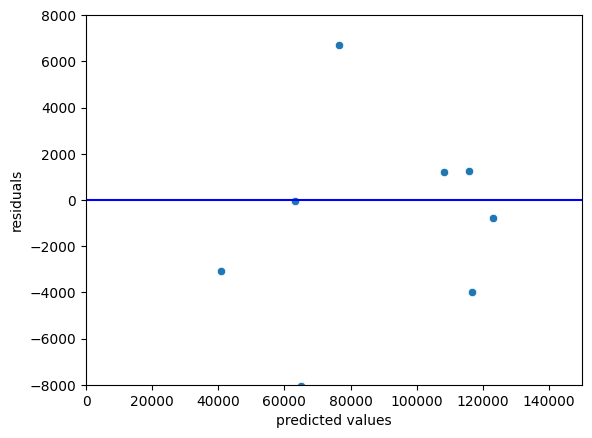

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred and error are your data arrays
sns.scatterplot(x=y_pred, y=error)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim([0, 150000])
plt.ylim([-8000, 8000])
sns.lineplot(x=[0, 150000], y=[0, 0], color='blue')  # Provide x and y values as separate arguments
plt.show()


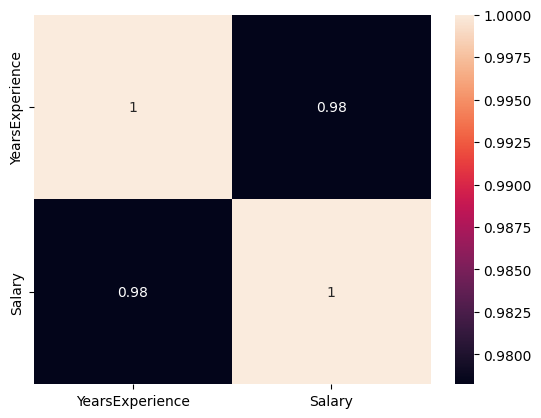

In [50]:
sns.heatmap(df.corr(),annot=True)
plt.show()